<a href="https://colab.research.google.com/github/tigju/Black-Cats-And-Black-Dogs-Syndrome/blob/master/Black_Cats_and_Black_Dogs_Syndrome_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Austin_Animal_Center_Outcomes (2).csv to Austin_Animal_Center_Outcomes (2).csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Austin_Animal_Center_Intakes (1).csv to Austin_Animal_Center_Intakes (1).csv


In [0]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
import seaborn as sns

## Exploration of the data

In [2]:
columns_intake = ['Animal ID', 'Name intake', 'DateTime Intake', 'MonthYear Intake', 'Found Location', 'Intake Type', 'Intake Condition',
                  'Animal Type Intake', 'Sex upon Intake', 'Age upon Intake', 'Breed Intake', 'Color Intake']
shelter_intake = pd.read_csv('Austin_Animal_Center_Intakes (1).csv', skiprows=1, header=None, names=columns_intake)
print(shelter_intake.shape)
shelter_intake.head()

(115612, 12)


,Animal ID,Name intake,DateTime Intake,MonthYear Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [3]:
shelter_intake['Animal ID'].value_counts()

A721033    33
A718223    14
A718877    12
A706536    11
A737814     9
           ..
A773744     1
A810520     1
A666330     1
A792075     1
A795955     1
Name: Animal ID, Length: 103355, dtype: int64

In [4]:
columns_outcome = ['Animal ID', 'Name Outcome', 'DateTime Outcome', 'MonthYear Outcome', 'Date of Birth', 'Outcome Type', 'Outcome Subtype',
                  'Animal Type Outcome', 'Sex upon Outcome', 'Age upon Outcome', 'Breed Outcome', 'Color Outcome']
shelter_outcome = pd.read_csv('Austin_Animal_Center_Outcomes (2).csv',skiprows=1, header=None, names=columns_outcome)
print(shelter_outcome.shape)
shelter_outcome.head()

(115778, 12)


,Animal ID,Name Outcome,DateTime Outcome,MonthYear Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [5]:
shelter_intake['Animal ID'].value_counts()

A721033    33
A718223    14
A718877    12
A706536    11
A737814     9
           ..
A773744     1
A810520     1
A666330     1
A792075     1
A795955     1
Name: Animal ID, Length: 103355, dtype: int64

In [6]:
shelter_outcome['Animal ID'].value_counts()

A721033    33
A718223    14
A718877    12
A706536    11
A717053     9
           ..
A742019     1
A654471     1
A747944     1
A689856     1
A795955     1
Name: Animal ID, Length: 103570, dtype: int64

In [7]:
shelter_outcome['Outcome Type'].value_counts()

Adoption           51032
Transfer           34473
Return to Owner    20375
Euthanasia          7704
Died                1057
Rto-Adopt            575
Disposal             468
Missing               67
Relocate              20
Name: Outcome Type, dtype: int64

In [8]:
shelter_intake['Animal Type Intake'].value_counts()

Dog          65817
Cat          43278
Other         5957
Bird           539
Livestock       21
Name: Animal Type Intake, dtype: int64

In [9]:
shelter_outcome['Animal Type Outcome'].value_counts()

Dog          65745
Cat          43538
Other         5938
Bird           539
Livestock       18
Name: Animal Type Outcome, dtype: int64

In [10]:
shelter_intake.isnull().sum()

Animal ID                 0
Name intake           36354
DateTime Intake           0
MonthYear Intake          0
Found Location            0
Intake Type               0
Intake Condition          0
Animal Type Intake        0
Sex upon Intake           1
Age upon Intake           0
Breed Intake              0
Color Intake              0
dtype: int64

In [11]:
shelter_outcome.isnull().sum()

Animal ID                  0
Name Outcome           36272
DateTime Outcome           0
MonthYear Outcome          0
Date of Birth              0
Outcome Type               7
Outcome Subtype        63464
Animal Type Outcome        0
Sex upon Outcome           3
Age upon Outcome          25
Breed Outcome              0
Color Outcome              0
dtype: int64

In [12]:
shelter_intake['Age upon Intake'].value_counts()

1 year       20593
2 years      17258
1 month      11095
3 years       6978
2 months      6173
4 years       4218
4 weeks       4137
5 years       3827
3 weeks       3405
3 months      2991
4 months      2987
5 months      2881
6 years       2572
2 weeks       2349
6 months      2250
7 years       2190
8 years       2141
7 months      1759
9 months      1743
10 years      1698
8 months      1403
9 years       1248
1 week         945
10 months      915
12 years       831
1 weeks        788
11 months      730
0 years        708
11 years       695
1 day          579
13 years       529
3 days         504
2 days         455
14 years       361
15 years       309
4 days         302
5 weeks        302
6 days         284
5 days         173
16 years       133
17 years        74
18 years        46
19 years        24
20 years        17
-1 years         4
22 years         4
24 years         1
-3 years         1
21 years         1
25 years         1
Name: Age upon Intake, dtype: int64

In [13]:
shelter_outcome['Age upon Outcome'].value_counts()

1 year       20853
2 years      17247
2 months     13904
3 years       7065
3 months      5422
1 month       5077
4 years       4183
5 years       3860
4 months      3702
5 months      2864
6 months      2783
6 years       2585
8 years       2220
7 years       2190
3 weeks       2018
2 weeks       1914
8 months      1853
10 years      1751
4 weeks       1725
10 months     1672
7 months      1481
9 months      1212
9 years       1210
12 years       867
1 weeks        768
11 months      715
11 years       691
1 week         627
13 years       552
14 years       369
2 days         330
3 days         321
15 years       313
1 day          240
6 days         228
4 days         205
0 years        170
5 days         145
16 years       134
5 weeks        109
17 years        77
18 years        48
19 years        24
20 years        17
22 years         4
-1 years         4
24 years         1
-3 years         1
25 years         1
21 years         1
Name: Age upon Outcome, dtype: int64

In [0]:
shelter_intake['DateTime Intake'] = pd.to_datetime(shelter_intake['DateTime Intake'], infer_datetime_format=True)

In [0]:
shelter_outcome['DateTime Outcome'] = pd.to_datetime(shelter_outcome['DateTime Outcome'], infer_datetime_format=True)

In [16]:
shelter_intake.dtypes

Animal ID                     object
Name intake                   object
DateTime Intake       datetime64[ns]
MonthYear Intake              object
Found Location                object
Intake Type                   object
Intake Condition              object
Animal Type Intake            object
Sex upon Intake               object
Age upon Intake               object
Breed Intake                  object
Color Intake                  object
dtype: object

In [17]:
shelter_outcome.dtypes

Animal ID                      object
Name Outcome                   object
DateTime Outcome       datetime64[ns]
MonthYear Outcome              object
Date of Birth                  object
Outcome Type                   object
Outcome Subtype                object
Animal Type Outcome            object
Sex upon Outcome               object
Age upon Outcome               object
Breed Outcome                  object
Color Outcome                  object
dtype: object

In [18]:
# drop duplicate column
shelter_outcome = shelter_outcome.drop('MonthYear Outcome', axis=1)
shelter_outcome

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
0,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,2014-03-18 11:47:00,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,2014-10-18 18:52:00,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
...,...,...,...,...,...,...,...,...,...,...,...
115773,A812410,Eli,2020-02-24 18:39:00,09/07/2019,Adoption,NaN,Cat,Neutered Male,5 months,Domestic Shorthair,Black
115774,A813894,Jethro,2020-02-24 18:54:00,02/20/2019,Adoption,NaN,Dog,Neutered Male,1 year,Dachshund/Chihuahua Shorthair,Red/Cream
115775,A813742,Midnight,2020-02-24 18:22:00,12/08/2019,Adoption,NaN,Cat,Intact Male,2 months,Domestic Shorthair,Black
115776,A800013,*Tumbleweed,2020-02-24 18:45:00,07/15/2013,Adoption,NaN,Dog,Spayed Female,6 years,Dachshund,Brown Brindle


In [19]:
# drop duplicate column
shelter_intake = shelter_intake.drop('MonthYear Intake', axis=1)
shelter_intake

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...
115607,A814027,Quesito,2020-02-24 13:17:00,4320 S Congress in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair,White
115608,A812875,*Jade,2020-02-24 18:01:00,Outside Jurisdiction,Owner Surrender,Normal,Dog,Spayed Female,3 years,Pit Bull,Brown/White
115609,A813882,*Donut,2020-02-20 12:09:00,3411 Andtree Boulvevard in Austin (TX),Public Assist,Normal,Cat,Intact Female,1 year,Domestic Shorthair,Tortie
115610,A814133,Tony,2020-02-24 17:59:00,619 Montopolis in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Staffordshire Mix,Brown/White


In [20]:
shelter_intake = shelter_intake.sort_values(by='DateTime Intake')
shelter_intake.tail()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
115610,A814133,Tony,2020-02-24 17:59:00,619 Montopolis in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Staffordshire Mix,Brown/White
115608,A812875,*Jade,2020-02-24 18:01:00,Outside Jurisdiction,Owner Surrender,Normal,Dog,Spayed Female,3 years,Pit Bull,Brown/White
115597,A814134,NaN,2020-02-24 18:15:00,10409 Little Pebble in Austin (TX),Abandoned,Normal,Dog,Intact Male,1 year,Pit Bull,White/Black
115603,A814135,NaN,2020-02-24 18:42:00,9024 Northgate in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Great Pyrenees,White/Tricolor
115611,A814136,NaN,2020-02-24 19:09:00,1150 Gunter St in Austin (TX),Public Assist,Normal,Dog,Intact Female,2 years,Border Collie,Brown/White


In [21]:
condition = (shelter_outcome['Outcome Type'] == 'Adoption') & (shelter_outcome['Animal Type Outcome'] == 'Cat')
cats_adoption = shelter_outcome[condition]
print(cats_adoption.shape)
cats_adoption.head(10)

(19572, 11)


,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
4,A689724,*Donatello,2014-10-18 18:52:00,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
5,A680969,*Zeus,2014-08-05 16:59:00,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
13,A730621,*Liza,2016-09-10 18:59:00,05/18/2016,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Calico
19,A801106,NaN,2019-08-16 14:05:00,05/06/2019,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Orange Tabby
44,A792258,Vesper,2019-04-10 20:53:00,09/08/2016,Adoption,NaN,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Tortie
46,A705205,*Dell,2015-06-20 16:25:00,03/30/2015,Adoption,Offsite,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Blue Tabby
56,A696409,*Hans,2015-02-09 18:46:00,11/19/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
59,A778589,NaN,2018-09-26 10:04:00,07/02/2018,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Cream Tabby
69,A657197,Gecko,2013-10-09 13:15:00,05/12/2013,Adoption,NaN,Cat,Neutered Male,4 months,Domestic Shorthair Mix,Brown Tabby
70,A783412,*Yams,2018-12-16 12:45:00,10/30/2008,Adoption,NaN,Cat,Neutered Male,10 years,Domestic Shorthair Mix,Black


In [22]:
cats_adoption['Outcome Subtype'].value_counts()

Foster     5038
Offsite     114
Barn          1
Name: Outcome Subtype, dtype: int64

In [23]:
print(len(cats_adoption['Color Outcome'].unique()))
cats_adoption['Color Outcome'].value_counts()[:30]

170


Brown Tabby           2871
Black                 2452
Black/White           1825
Brown Tabby/White     1607
Orange Tabby          1355
Calico                 964
Tortie                 903
Orange Tabby/White     796
Blue Tabby             782
Blue                   721
Torbie                 630
Blue/White             561
Blue Tabby/White       440
Cream Tabby            363
White/Black            322
Lynx Point             299
White/Brown Tabby      222
Seal Point             200
Cream Tabby/White      180
White                  151
Flame Point            148
Torbie/White           147
White/Blue             121
Black Smoke            102
Black Tabby             78
White/Orange Tabby      76
Tortie Point            67
Calico/White            63
Gray Tabby              63
Tortie/White            58
Name: Color Outcome, dtype: int64

In [24]:
cats_incoming = shelter_intake[shelter_intake['Animal Type Intake'] == 'Cat']
cats_incoming.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
34007,A664235,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
101061,A664236,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
2072,A664237,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
30064,A664238,NaN,2013-10-01 09:33:00,Outside Jurisdiction,Stray,Normal,Cat,Unknown,4 months,American Shorthair Mix,Black/White
12783,A664256,*Donnie,2013-10-01 10:59:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,17 years,Domestic Shorthair Mix,Brown Tabby/White


In [0]:
cats_outcome = shelter_outcome[shelter_outcome['Animal Type Outcome'] == 'Cat']
cats_crosstab = pd.crosstab(cats_outcome['Color Outcome'], cats_outcome['Outcome Type'] == 'Adoption')

In [26]:
cats_crosstab

Outcome Type,False,True
Color Outcome,,
Agouti,5,4
Agouti/Brown Tabby,0,1
Agouti/Cream,1,0
Agouti/White,1,0
Apricot,0,1
...,...,...
White/Yellow,2,0
Yellow,1,0
Yellow/Cream,0,2


In [27]:
chi_squared_scipy, p_value, dof, expected = stats.chi2_contingency(cats_crosstab)

print(f"Chi-Squared: {chi_squared_scipy}")
print(f"P-value: {p_value:.70f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected: \n {np.array(expected)}")

Chi-Squared: 752.5023888915993
P-value: 0.0000000000000000000000000000000000000000000000084046984831175694305488
Degrees of freedom: 267
Expected: 
 [[4.95415499e+00 4.04584501e+00]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [3.13763149e+03 2.56236851e+03]
 [1.10092333e+00 8.99076669e-01]
 [8.58720198e+01 7.01279802e+01]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [2.14680050e+01 1.75319950e+01]
 [1.24954798e+02 1.02045202e+02]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [5.50461666e-01 4.49538334e-01]
 [4.01837016e+01 3.28162984e+01]
 [1.10092333e+00 8.99076669e-01]
 [5.50461666e-01 4.49538334e-01]
 [3.68809316e+01 3.01190684e+01]
 [2.75230833e+00 2.24769167e+00]
 [1.10092333e+00 8.99076669e-01]
 [1.10092333e+00 8.99076669e-01]
 [3.30276999e+00 2.69723001e+00]
 [1.65138500e+00 1.3486150

In [0]:
dogs_outcome = shelter_outcome[shelter_outcome['Animal Type Outcome'] == 'Dog']
dogs_crosstab = pd.crosstab(dogs_outcome['Color Outcome'], dogs_outcome['Outcome Type'] == 'Adoption')

In [29]:
dogs_crosstab

Outcome Type,False,True
Color Outcome,,
Agouti,2,2
Apricot,42,33
Apricot/Brown,3,0
Apricot/Tricolor,2,0
Apricot/White,8,3
...,...,...
Yellow/Cream,1,1
Yellow/Gray,2,0
Yellow/Tan,3,1


In [30]:
chi_squared_scipy, p_value, dof, expected = stats.chi2_contingency(dogs_crosstab)

print(f"Chi-Squared: {chi_squared_scipy}")
print(f"P-value: {p_value:.70f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected: \n {np.array(expected)}")

Chi-Squared: 947.2187210724021
P-value: 0.0000000000000000000000000000000000000000000000000001106591591616461942
Degrees of freedom: 368
Expected: 
 [[2.12530230e+00 1.87469770e+00]
 [3.98494182e+01 3.51505818e+01]
 [1.59397673e+00 1.40602327e+00]
 [1.06265115e+00 9.37348848e-01]
 [5.84458134e+00 5.15541866e+00]
 [1.85910819e+03 1.63989181e+03]
 [5.73831622e+01 5.06168378e+01]
 [5.31325576e+00 4.68674424e+00]
 [5.31325576e-01 4.68674424e-01]
 [5.31325576e-01 4.68674424e-01]
 [9.03253479e+00 7.96746521e+00]
 [1.06265115e+00 9.37348848e-01]
 [1.59397673e+00 1.40602327e+00]
 [1.28049464e+02 1.12950536e+02]
 [4.25060461e+00 3.74939539e+00]
 [5.31325576e-01 4.68674424e-01]
 [5.31325576e-01 4.68674424e-01]
 [5.31325576e-01 4.68674424e-01]
 [1.06265115e+00 9.37348848e-01]
 [5.31325576e+00 4.68674424e+00]
 [5.31325576e-01 4.68674424e-01]
 [5.31325576e-01 4.68674424e-01]
 [3.55988136e+01 3.14011864e+01]
 [7.43855807e+00 6.56144193e+00]
 [5.31325576e-01 4.68674424e-01]
 [2.12530230e+00 1.8746977

## Chi Squared tests with extremely low p-value showed that adoption of cats and dogs is very dependent on fur color.

## Cat Adoption exploration by Color

In [31]:
cats_colors_incoming = cats_incoming['Color Intake'].isin(['Brown Tabby', 'Black', 'Black/White', 'Brown Tabby/White', 'Orange Tabby', 'Calico', 'Tortie', 'Orange Tabby/White',
                                            'Blue Tabby', 'Blue', 'Torbie', 'Blue/White', 'Blue Tabby/White', 'Cream Tabby', 'White/Black', 'Lynx Point', 'White/Brown Tabby',
                                            'Seal Point', 'Cream Tabby/White', 'Flame Point', 'White', 'Torbie/White', 'White/Blue', 'Black Smoke'])
cats_colors_intake = cats_incoming[cats_colors_incoming].sort_values(by='Color Intake', ascending=True)
cats_colors_intake.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
49099,A701193,Charlie,2015-04-25 12:03:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Black
72305,A757125,Bently,2017-08-30 12:33:00,2300 Morelos Street in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black
32735,A757126,*Victor,2017-08-30 12:33:00,2300 Morelos Street in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black
48636,A757124,*Venus,2017-08-30 12:33:00,2300 Morelos Street in Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Black
59798,A757234,NaN,2017-08-31 15:57:00,2200 Willow Creek Drive in Austin (TX),Stray,Normal,Cat,Unknown,3 weeks,Domestic Medium Hair Mix,Black


In [32]:
popular_colors_cats = cats_adoption['Color Outcome'].isin(['Brown Tabby', 'Black', 'Black/White', 'Brown Tabby/White', 'Orange Tabby', 'Calico', 'Tortie', 'Orange Tabby/White',
                                            'Blue Tabby', 'Blue', 'Torbie', 'Blue/White', 'Blue Tabby/White', 'Cream Tabby', 'White/Black', 'Lynx Point', 'White/Brown Tabby',
                                            'Seal Point', 'Cream Tabby/White', 'Flame Point', 'White', 'Torbie/White', 'White/Blue', 'Black Smoke'])
cats_colors_adoption = cats_adoption[popular_colors_cats].sort_values(by='Color Outcome', ascending=True)
cats_colors_adoption.head()

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
4,A689724,*Donatello,2014-10-18 18:52:00,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
47394,A791240,Shadow,2019-04-23 16:33:00,02/23/2019,Adoption,Foster,Cat,Neutered Male,1 month,Domestic Medium Hair Mix,Black
47420,A751775,NaN,2017-06-17 12:28:00,02/25/2017,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Black
47452,A791900,*Benjen,2019-04-07 17:06:00,04/02/2018,Adoption,NaN,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Black
47476,A783337,*Sally,2018-12-15 17:52:00,08/23/2018,Adoption,Foster,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Black


In [33]:
overall_cats_outcome = cats_outcome['Color Outcome'].isin(['Brown Tabby', 'Black', 'Black/White', 'Brown Tabby/White', 'Orange Tabby', 'Calico', 'Tortie', 'Orange Tabby/White',
                                            'Blue Tabby', 'Blue', 'Torbie', 'Blue/White', 'Blue Tabby/White', 'Cream Tabby', 'White/Black', 'Lynx Point', 'White/Brown Tabby',
                                            'Seal Point', 'Cream Tabby/White', 'Flame Point', 'White', 'Torbie/White', 'White/Blue', 'Black Smoke'])
cats_colors_overall_outcome = cats_outcome[overall_cats_outcome].sort_values(by='Color Outcome', ascending=True)
cats_colors_overall_outcome.head()

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
58289,A687148,Midnight,2014-09-05 16:59:00,06/16/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
48772,A769466,Peru,2018-04-11 17:11:00,02/05/2017,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Shorthair,Black
48781,A702979,*Jackson,2015-07-03 13:04:00,04/07/2015,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
48795,A805178,NaN,2019-09-27 12:25:00,03/23/2019,Transfer,Snr,Cat,Unknown,6 months,Domestic Shorthair,Black
48820,A576207,NaN,2014-12-22 10:45:00,03/27/2010,Euthanasia,Suffering,Cat,Neutered Male,4 years,Domestic Shorthair Mix,Black


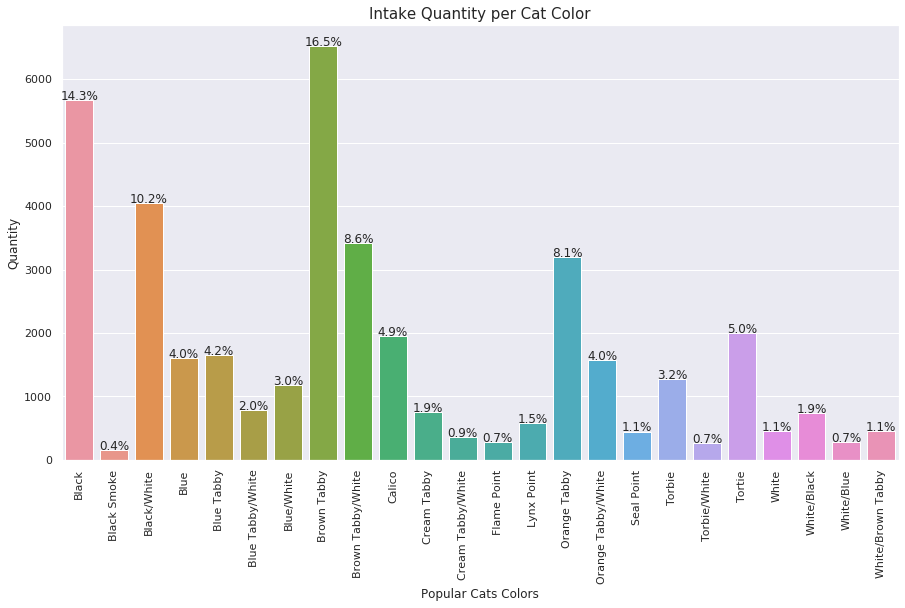

In [34]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
# sns.countplot(x=cats_colors_intake['Color Intake'], data=cats_colors_intake, alpha=0.8)
total = float(len(cats_colors_intake))

ax = sns.countplot(x=cats_colors_intake['Color Intake'], data=cats_colors_intake)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height/total*100:1.1f}%',
            ha="center")
# print(ax.get_children()[0])
# print(ax.get_children()[0].set_color('black'))
plt.title("Intake Quantity per Cat Color", fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Popular Cats Colors', fontsize=12)
plt.xticks(rotation='vertical')

plt.show()

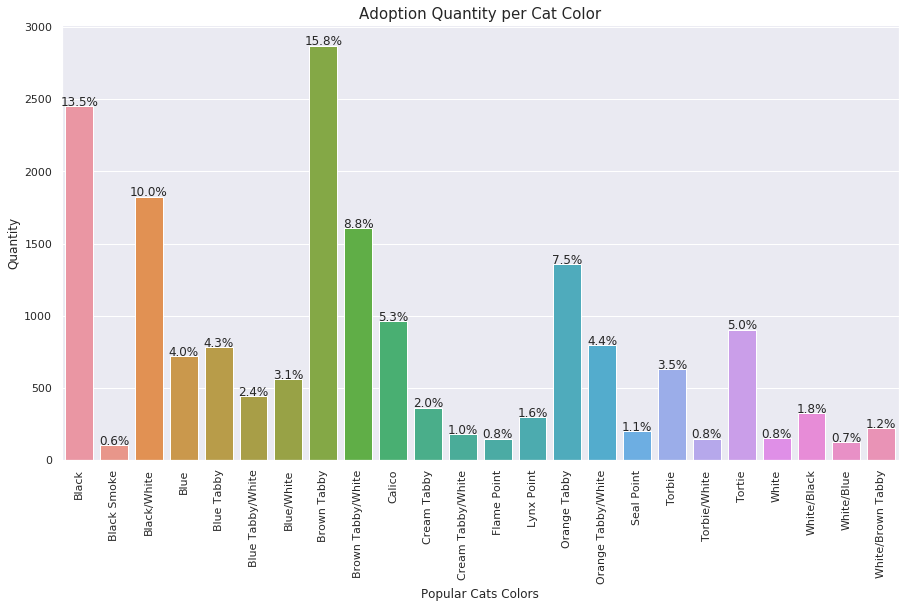

In [35]:
plt.figure(figsize=(15,8))
# sns.set(style="darkgrid")

total = float(len(cats_colors_adoption))

ax = sns.countplot(x=cats_colors_adoption['Color Outcome'], data=cats_colors_adoption)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height/total*100:1.1f}%',
            ha="center")
# print(ax.get_children()[0])
# print(ax.get_children()[0].set_color('black'))
plt.title("Adoption Quantity per Cat Color", fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Popular Cats Colors', fontsize=12)
plt.xticks(rotation='vertical')

plt.show()

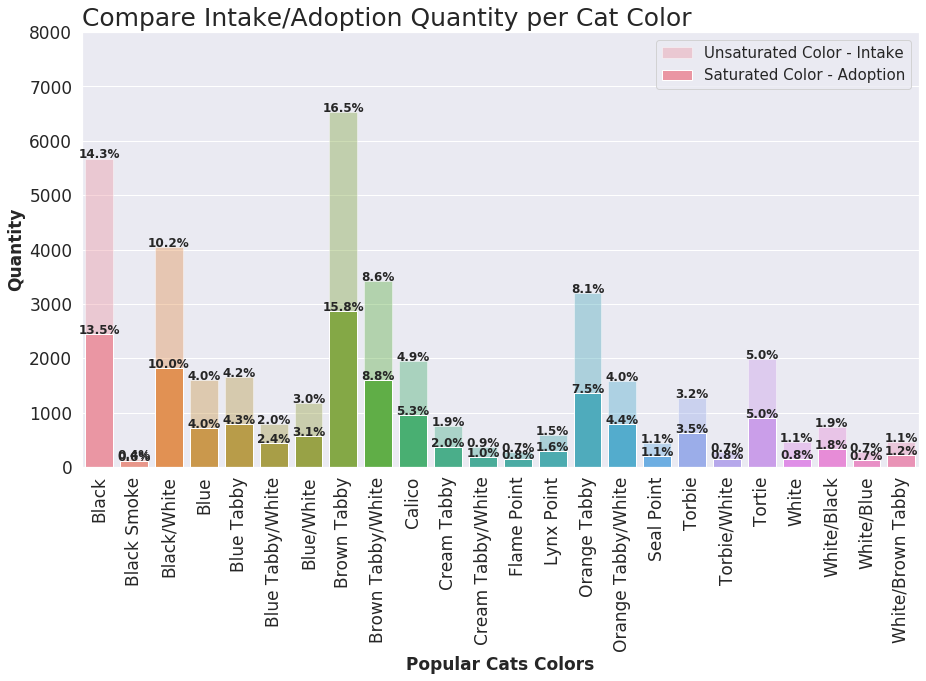

In [36]:
plt.figure(figsize=(15,8))
# sns.set(style="darkgrid")
total = float(len(cats_colors_intake))
total2 = float(len(cats_colors_adoption))

ax = sns.countplot(x=cats_colors_intake['Color Intake'], data=cats_colors_intake, alpha=0.4, label='Unsaturated Color - Intake')
ax = sns.countplot(x=cats_colors_adoption['Color Outcome'], data=cats_colors_adoption, label='Saturated Color - Adoption')

plt.ylim((0, 8000)) 

plt.legend(fontsize=15)

for p in ax.patches[:24]:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x()+width/2.,
            height + 3,
            f'{height/total*100:1.1f}%',
            ha="center",
            fontweight='bold')
    
for p in ax.patches[24:]:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x()+width/2.,
            height+3,
            f'{height/total2*100:1.1f}%',
            ha="center",
            fontweight='bold')

plt.title("Compare Intake/Adoption Quantity per Cat Color", fontsize=25, loc='left')
plt.ylabel('Quantity', fontweight='bold', fontsize=17)
plt.xlabel('Popular Cats Colors', fontweight='bold', fontsize=17)
plt.xticks(rotation='vertical', fontsize=17)
plt.yticks(fontsize=17)

plt.show()

In [37]:
# exctract the numbers of Cats Intake and cats outcome

value1 = cats_colors_intake['Color Intake'].value_counts(ascending=True).sort_index()
val1 = np.array(value1.values)
print(val1)
value2 = cats_colors_adoption['Color Outcome'].value_counts(ascending=True).sort_index()
val2 = np.array(value2.values)
print(val2)

# calculate the average percent of adoption rate by color
result = val2/val1*100
print(result)
result.dtype

[5674  151 4041 1601 1648  787 1174 6525 3413 1946  753  360  279  583
 3195 1577  448 1270  268 1994  453  735  281  452]
[2452  102 1825  721  782  440  561 2871 1607  964  363  180  148  299
 1355  796  200  630  147  903  151  322  121  222]
[43.21466338 67.54966887 45.16208859 45.03435353 47.45145631 55.90851334
 47.78534923 44.         47.08467624 49.53751285 48.20717131 50.
 53.04659498 51.2864494  42.41001565 50.47558656 44.64285714 49.60629921
 54.85074627 45.28585757 33.33333333 43.80952381 43.06049822 49.11504425]


dtype('float64')

In [38]:
average_adoption_rate = pd.DataFrame(data=result, columns=['Percent'], index=['Black', 'Black Smoke', 'Black/White', 'Blue', 'Blue Tabby', 'Blue Tabby/White', 'Blue/White', 'Brown Tabby',
                                            'Brown Tabby/White', 'Calico', 'Cream Tabby', 'Cream Tabby/White', 'Flame Point', 'Lynx Point', 'Orange Tabby', 'Orange Tabby/White',
                                            'Seal Point','Torbie', 'Torbie/White', 'Tortie', 'White', 'White/Black', 'White/Blue', 'White/Brown Tabby'])
average_adoption_rate

,Percent
Black,43.214663
Black Smoke,67.549669
Black/White,45.162089
Blue,45.034354
Blue Tabby,47.451456
Blue Tabby/White,55.908513
Blue/White,47.785349
Brown Tabby,44.000000
Brown Tabby/White,47.084676
Calico,49.537513


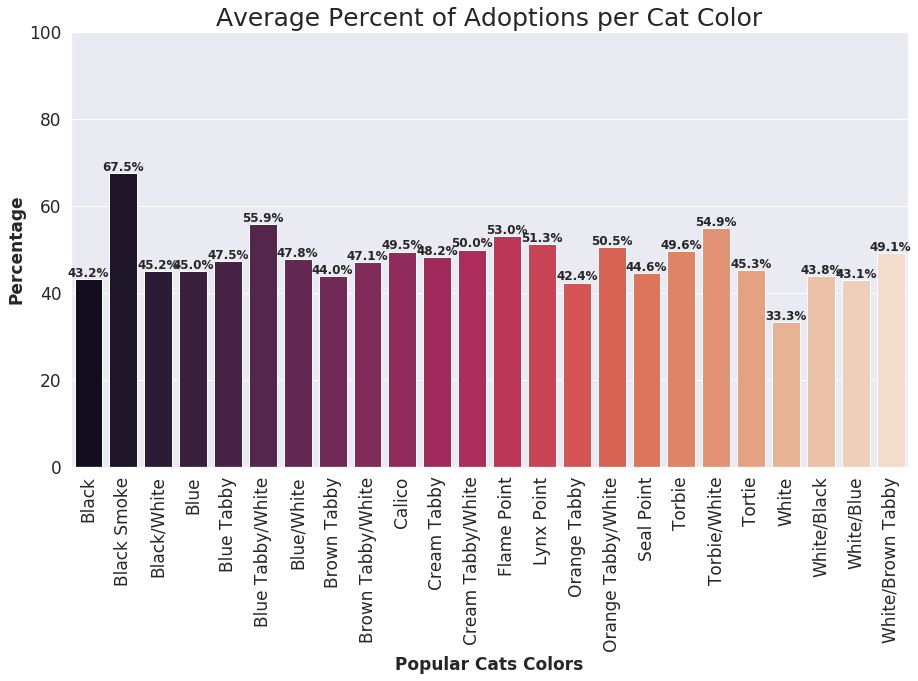

In [39]:
plt.figure(figsize=(15,8))

axes = sns.barplot(x=average_adoption_rate.index, y=average_adoption_rate['Percent'], palette="rocket")

plt.ylim((0, 100)) 

for p in axes.patches:
    height = p.get_height()
    width = p.get_width()
    axes.text(p.get_x()+width/2.,
            height+.5,
            f'{height:1.1f}%',
            ha="center",
            fontweight='bold')

plt.title("Average Percent of Adoptions per Cat Color", fontsize=25)
plt.ylabel('Percentage', fontweight='bold', fontsize=17)
plt.xlabel('Popular Cats Colors', fontweight='bold', fontsize=17)
plt.xticks(rotation='vertical', fontsize=17)
plt.yticks(fontsize=17)
plt.show()

## Dogs Adoption exploration by Color

In [40]:
condition = (shelter_outcome['Outcome Type'] == 'Adoption') & (shelter_outcome['Animal Type Outcome'] == 'Dog')
dogs_adoption = shelter_outcome[condition]
print(dogs_adoption.shape)
dogs_adoption.head()

(30813, 11)


,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
14,A765349,Einstein,2018-06-08 13:04:00,01/18/2009,Adoption,Foster,Dog,Neutered Male,9 years,Chihuahua Shorthair Mix,Tricolor
22,A757919,*Tofu,2017-10-05 15:36:00,09/08/2015,Adoption,NaN,Dog,Spayed Female,2 years,Beagle Mix,Brown/White
23,A789298,*Mr Wrinkles,2019-04-23 11:59:00,02/15/2019,Adoption,Foster,Dog,Neutered Male,2 months,Labrador Retriever Mix,Brown/White


In [41]:
dogs_adoption['Color Outcome'].value_counts()[:30]

Black/White            3924
Tan/White              1760
Brown/White            1698
Black                  1522
Tan                    1393
White                  1339
Tricolor               1306
Black/Tan              1284
Brown                  1135
Black/Brown            1130
White/Black            1097
Brown Brindle/White     972
White/Brown             959
Blue/White              878
White/Tan               820
Brown/Black             809
Red/White               594
Red                     554
Tan/Black               529
Brown Brindle           466
Chocolate/White         462
Cream                   290
Sable                   284
Yellow                  240
Fawn/White              236
Black/Tricolor          227
White/Brown Brindle     214
Buff                    212
Chocolate               168
Brown/Tan               165
Name: Color Outcome, dtype: int64

In [42]:
dogs_incoming = shelter_intake[shelter_intake['Animal Type Intake'] == 'Dog']
dogs_incoming.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
63686,A521520,Nina,2013-10-01 07:51:00,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan
102580,A664233,Stevie,2013-10-01 08:53:00,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White
4174,A664234,NaN,2013-10-01 10:37:00,5400 Jimmy Clay in Austin (TX),Stray,Injured,Dog,Intact Male,8 years,Border Collie Mix,Black/White
77929,A664257,Pippin,2013-10-01 11:01:00,Burleson in Travis (TX),Stray,Normal,Dog,Intact Female,4 years,Podengo Pequeno Mix,Black
21020,A664266,NaN,2013-10-01 11:09:00,Payton And 183 in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Chihuahua Shorthair Mix,Buff


In [43]:
dogs_colors_incoming = dogs_incoming['Color Intake'].isin(['Black/White', 'Tan/White', 'Brown/White', 'Black', 'Tan', 'White', 'Tricolor', 'Black/Tan',
                                            'Black/Brown', 'Brown', 'Brown Brindle/White', 'Blue/White', 'Red/White', 'Red', 'Black/Tricolor', 'Chocolate/White', 'Sable',
                                            'Cream', 'Fawn/White', 'Yellow', 'Buff', 'Chocolate', 'Brown/Tan', 'Tan/Black'])
dogs_colors_intake = dogs_incoming[dogs_colors_incoming].sort_values(by='Color Intake', ascending=True)
dogs_colors_intake.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake
38859,A760403,Dallas,2017-12-19 17:18:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,8 months,Labrador Retriever Mix,Black
43674,A807898,Cali,2019-10-31 16:59:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,6 years,Labrador Retriever,Black
109717,A798077,Cody,2019-06-24 11:12:00,Downs Drive And Webberville Road in Austin (TX),Stray,Normal,Dog,Neutered Male,11 months,Labrador Retriever,Black
26053,A671758,*Lucy,2014-01-30 14:41:00,14809 Lucerne in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Labrador Retriever Mix,Black
103915,A799234,Maggie,2019-08-25 15:37:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,8 years,Labrador Retriever,Black


In [44]:
popular_colors_dogs = dogs_adoption['Color Outcome'].isin(['Black/White', 'Tan/White', 'Brown/White', 'Black', 'Tan', 'White', 'Tricolor', 'Black/Tan',
                                            'Black/Brown', 'Brown', 'Brown Brindle/White', 'Blue/White', 'Red/White', 'Red', 'Black/Tricolor', 'Chocolate/White', 'Sable',
                                            'Cream', 'Fawn/White', 'Yellow', 'Buff', 'Chocolate', 'Brown/Tan', 'Tan/Black'])
dogs_colors_adoption = dogs_adoption[popular_colors_dogs].sort_values(by='Color Outcome', ascending=True)
dogs_colors_adoption.head()

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
12321,A692008,Zaida,2016-01-02 16:45:00,11/13/2013,Adoption,NaN,Dog,Spayed Female,2 years,Labrador Retriever Mix,Black
76966,A663952,*Moki,2013-10-12 18:02:00,11/29/2012,Adoption,NaN,Dog,Neutered Male,10 months,Chihuahua Shorthair/Dachshund,Black
21554,A741523,*Quimby,2017-01-15 17:56:00,09/03/2016,Adoption,NaN,Dog,Neutered Male,4 months,Labrador Retriever Mix,Black
49995,A737639,*Vegas,2017-02-18 15:15:00,11/01/2013,Adoption,NaN,Dog,Neutered Male,3 years,Pit Bull Mix,Black
56488,A748517,*North,2018-01-09 10:35:00,05/19/2009,Adoption,Foster,Dog,Neutered Male,8 years,Labrador Retriever Mix,Black


In [0]:
dogs_outcome = shelter_outcome[shelter_outcome['Animal Type Outcome'] == 'Dog']

In [46]:
overall_dogs_outcome = dogs_outcome['Color Outcome'].isin(['Black/White', 'Tan/White', 'Brown/White', 'Black', 'Tan', 'White', 'Tricolor', 'Black/Tan',
                                            'Black/Brown', 'Brown', 'Brown Brindle/White', 'Blue/White', 'Red/White', 'Red', 'Black/Tricolor', 'Chocolate/White', 'Sable',
                                            'Cream', 'Fawn/White', 'Yellow', 'Buff', 'Chocolate', 'Brown/Tan', 'Tan/Black'])
dogs_colors_overall_outcome = dogs_outcome[overall_dogs_outcome].sort_values(by='Color Outcome', ascending=True)
dogs_colors_overall_outcome.head()

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
56292,A705648,Floyd,2016-10-05 18:51:00,06/19/2010,Return to Owner,NaN,Dog,Neutered Male,6 years,Boxer Mix,Black
76649,A757039,NaN,2017-09-03 18:00:00,05/29/2017,Adoption,NaN,Dog,Neutered Male,3 months,Labrador Retriever Mix,Black
51068,A684041,*Bree,2014-08-26 19:20:00,07/18/2010,Adoption,NaN,Dog,Spayed Female,4 years,Labrador Retriever Mix,Black
105942,A619084,Dude,2017-10-06 18:37:00,09/09/2014,Return to Owner,NaN,Dog,Neutered Male,3 years,Labrador Retriever Mix,Black
62686,A687611,*Regina,2014-09-13 16:19:00,09/07/2013,Transfer,Partner,Dog,Spayed Female,1 year,Chihuahua Shorthair,Black


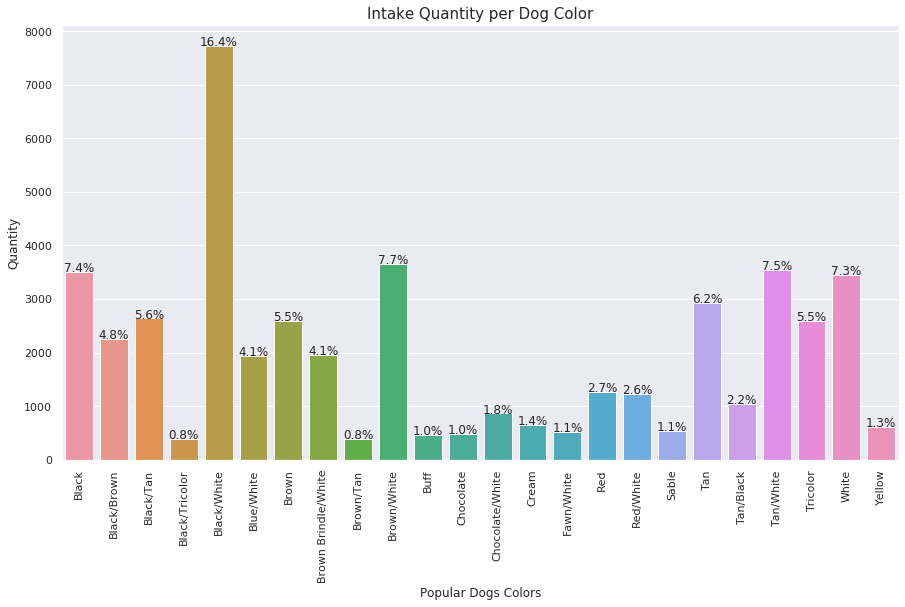

In [47]:
plt.figure(figsize=(15,8))
#sns.countplot(x=dogs_colors_intake['Color Intake'], data=dogs_colors_intake)

total = float(len(dogs_colors_intake))

ax = sns.countplot(x=dogs_colors_intake['Color Intake'], data=dogs_colors_intake)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height/total*100:1.1f}%',
            ha="center")

plt.title("Intake Quantity per Dog Color", fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Popular Dogs Colors', fontsize=12)
plt.xticks(rotation='vertical')

plt.show()

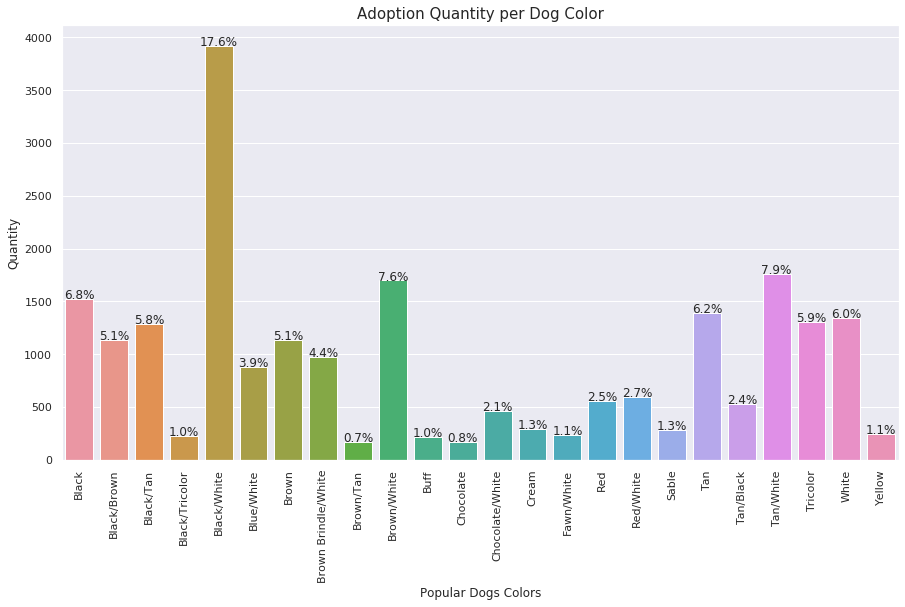

In [48]:
plt.figure(figsize=(15,8))
#sns.countplot(x=dogs_colors_intake['Color Intake'], data=dogs_colors_intake)

total = float(len(dogs_colors_adoption))

ax = sns.countplot(x=dogs_colors_adoption['Color Outcome'], data=dogs_colors_adoption)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height/total*100:1.1f}%',
            ha="center")

plt.title("Adoption Quantity per Dog Color", fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Popular Dogs Colors', fontsize=12)
plt.xticks(rotation='vertical')

plt.show()

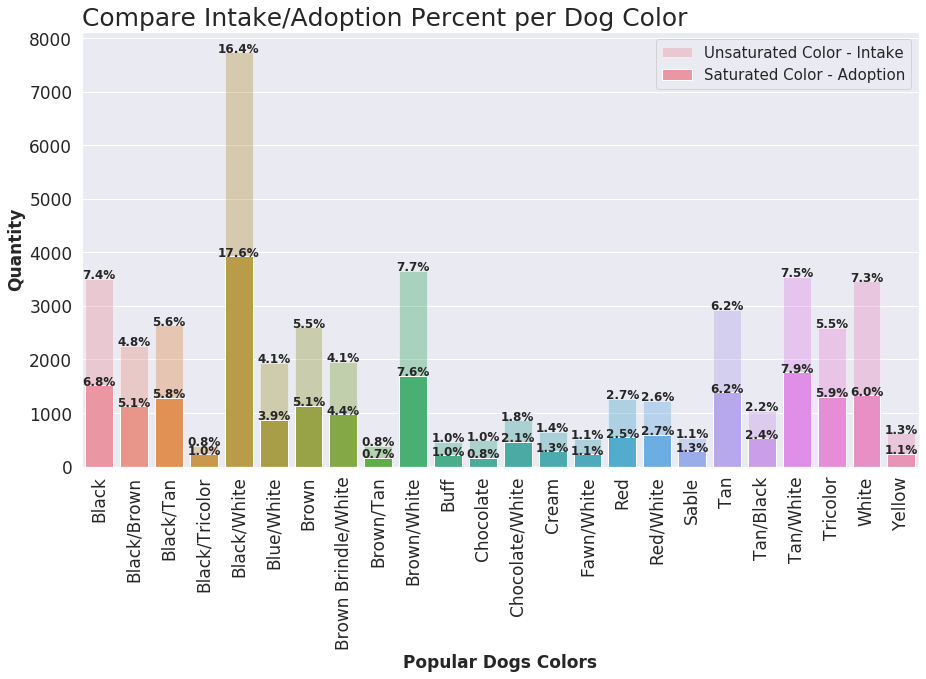

In [49]:
plt.figure(figsize=(15,8))
# sns.set(style="darkgrid")
total = float(len(dogs_colors_intake))
total2 = float(len(dogs_colors_adoption))


ax = sns.countplot(x=dogs_colors_intake['Color Intake'], data=dogs_colors_intake, alpha=0.4, label='Unsaturated Color - Intake')
ax = sns.countplot(x=dogs_colors_adoption['Color Outcome'], data=dogs_colors_adoption, label='Saturated Color - Adoption')

plt.legend(fontsize=15)


for p in ax.patches[:24]:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x()+width/2.,
            height + 3,
            f'{height/total*100:1.1f}%',
            ha="center",
            fontweight='bold')
    
for p in ax.patches[24:]:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x()+width/2.,
            height-3,
            f'{height/total2*100:1.1f}%',
            ha="center",
            fontweight='bold')

plt.title("Compare Intake/Adoption Percent per Dog Color", fontsize=25, loc='left')
plt.ylabel('Quantity', fontweight='bold', fontsize=17)
plt.xlabel('Popular Dogs Colors', fontweight='bold', fontsize=17)
plt.xticks(rotation='vertical', fontsize=17)
plt.yticks(fontsize=17)

plt.show()

In [50]:
# exctract the numbers of dogs Intake and dogs outcome

value_1 = dogs_colors_intake['Color Intake'].value_counts(ascending=True).sort_index()
val_1 = np.array(value_1.values)
print(val_1)
value_2 = dogs_colors_adoption['Color Outcome'].value_counts(ascending=True).sort_index()
val_2 = np.array(value_2.values)
print(val_2)

# calculate the average percent of adoption rate by color
result2 = val_2/val_1*100
print(result2)
result2.dtype

[3501 2254 2638  390 7732 1940 2596 1950  387 3658  460  488  865  649
  521 1261 1224  537 2929 1041 3546 2592 3456  619]
[1522 1130 1284  227 3924  878 1135  972  165 1698  212  168  462  290
  236  554  594  284 1393  529 1760 1306 1339  240]
[43.47329334 50.13309672 48.6732373  58.20512821 50.75012933 45.25773196
 43.7211094  49.84615385 42.63565891 46.41880809 46.08695652 34.42622951
 53.41040462 44.68412943 45.2975048  43.9333862  48.52941176 52.88640596
 47.55889382 50.81652257 49.63338973 50.38580247 38.74421296 38.77221325]


dtype('float64')

In [51]:
average_adoption_rate_dogs = pd.DataFrame(data=result2, columns=['Percent'], index=['Black', 'Black/Brown', 'Black/Tan', 'Black/Tricolor', 'Black/White', 'Blue/White', 'Brown',
                                                                                   'Brown Brindle/White', 'Brown/Tan', 'Brown/White', 'Buff', 'Chocolate', 'Chocolate/White',
                                                                                   'Cream', 'Frawn/White', 'Red', 'Red/White', 'Sabel', 'Tan', 'Tan/Black', 'Tan/White', 
                                                                                   'Tricolor', 'White', 'Yellow'])
average_adoption_rate_dogs

,Percent
Black,43.473293
Black/Brown,50.133097
Black/Tan,48.673237
Black/Tricolor,58.205128
Black/White,50.750129
Blue/White,45.257732
Brown,43.721109
Brown Brindle/White,49.846154
Brown/Tan,42.635659
Brown/White,46.418808


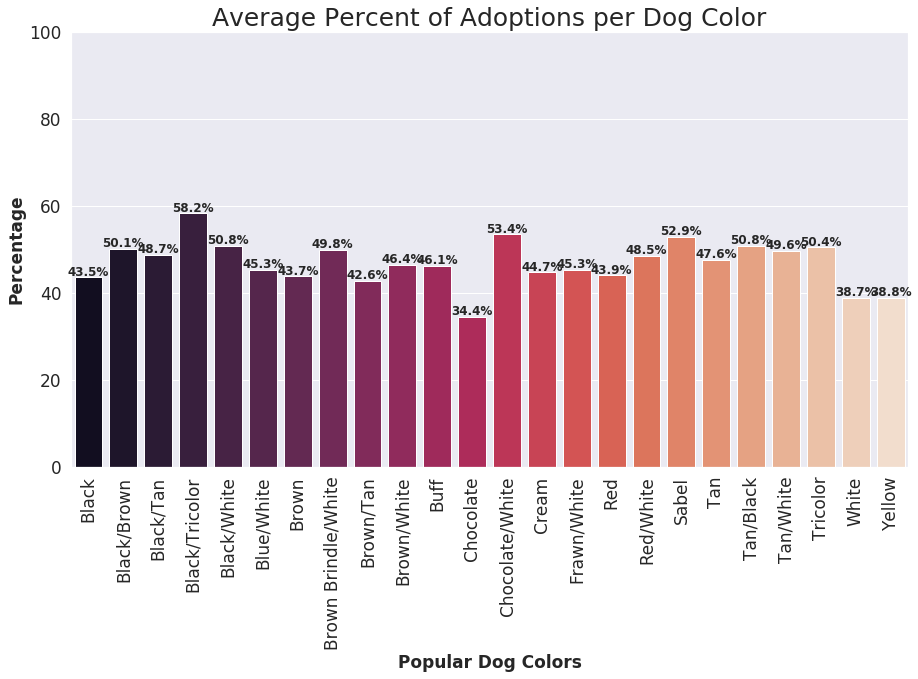

In [52]:
plt.figure(figsize=(15,8))

axes = sns.barplot(x=average_adoption_rate_dogs.index, y=average_adoption_rate_dogs['Percent'], palette="rocket")

plt.ylim((0, 100)) 

for p in axes.patches:
    height = p.get_height()
    width = p.get_width()
    axes.text(p.get_x()+width/2.,
            height+.5,
            f'{height:1.1f}%',
            ha="center",
            fontweight='bold')

plt.title("Average Percent of Adoptions per Dog Color", fontsize=25)
plt.ylabel('Percentage', fontweight='bold', fontsize=17)
plt.xlabel('Popular Dog Colors', fontweight='bold', fontsize=17)
plt.xticks(rotation='vertical', fontsize=17)
plt.yticks(fontsize=17)
plt.show()

## Adoption by month of the year

In [53]:
cats_adoption.head()

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome
4,A689724,*Donatello,2014-10-18 18:52:00,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
5,A680969,*Zeus,2014-08-05 16:59:00,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
13,A730621,*Liza,2016-09-10 18:59:00,05/18/2016,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Calico
19,A801106,NaN,2019-08-16 14:05:00,05/06/2019,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Orange Tabby
44,A792258,Vesper,2019-04-10 20:53:00,09/08/2016,Adoption,NaN,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Tortie


In [54]:
cats_adoption['Month Outcome'] = cats_adoption['DateTime Outcome'].dt.month
cats_adoption['Year Outcome'] = cats_adoption['DateTime Outcome'].dt.year
cats_incoming['Month Intake'] = cats_incoming['DateTime Intake'].dt.month
cats_incoming['Year Intake'] = cats_incoming['DateTime Intake'].dt.year

cats_adoption.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Animal ID,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome,Month Outcome,Year Outcome
4,A689724,*Donatello,2014-10-18 18:52:00,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,10,2014
5,A680969,*Zeus,2014-08-05 16:59:00,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,8,2014
13,A730621,*Liza,2016-09-10 18:59:00,05/18/2016,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Calico,9,2016
19,A801106,NaN,2019-08-16 14:05:00,05/06/2019,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Orange Tabby,8,2019
44,A792258,Vesper,2019-04-10 20:53:00,09/08/2016,Adoption,NaN,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Tortie,4,2019


In [55]:
print(cats_adoption['Month Outcome'].dtype)
print(cats_adoption['Year Outcome'].dtype)
print(cats_incoming['Month Intake'].dtype)
print(cats_incoming['Year Intake'].dtype)

int64
int64
int64
int64


In [56]:
black_cats_adoption = cats_adoption[cats_adoption['Color Outcome'] == 'Black']
val_b_c = black_cats_adoption['Month Outcome'].value_counts().sort_index()
val_b_c

1     164
2     119
3      88
4      63
5     133
6     263
7     345
8     310
9     229
10    244
11    215
12    279
Name: Month Outcome, dtype: int64

In [57]:
black_cats_adoption_month = pd.DataFrame(data=val_b_c.values, columns=['Number of Cats'], index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                                                                          'September', 'October', 'November', 'December'])
print(black_cats_adoption_month['Number of Cats'].dtype)
black_cats_adoption_month['Month'] = black_cats_adoption_month.index
black_cats_adoption_month.reset_index(drop=True, inplace=True)
black_cats_adoption_month.index

int64


RangeIndex(start=0, stop=12, step=1)

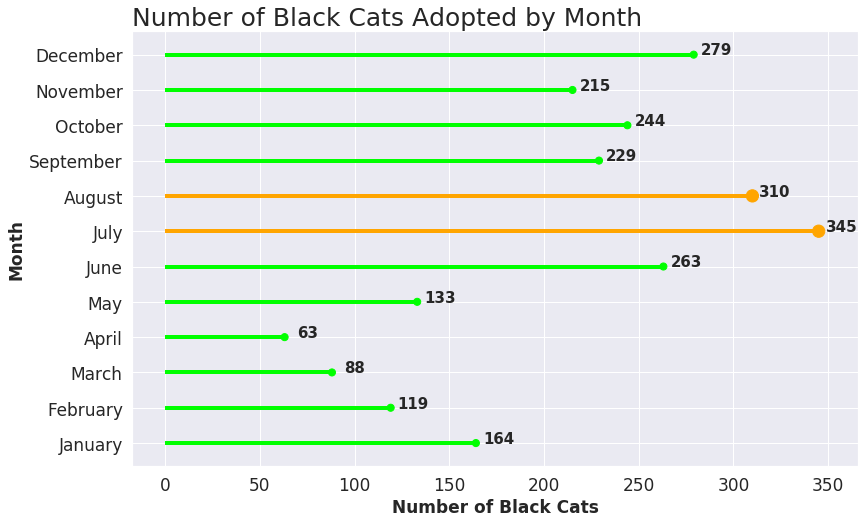

In [58]:
fig, ax = plt.subplots(1,1, figsize=(13,8))
        
my_color=np.where((black_cats_adoption_month["Month"] == 'July') | (black_cats_adoption_month['Month'] == 'August'), 'orange', 'lime')
my_size=np.where((black_cats_adoption_month['Month'] =='July') | (black_cats_adoption_month['Month'] == 'August'), 150, 50)

ax = plt.hlines(y=black_cats_adoption_month['Month'], xmin=0, xmax=black_cats_adoption_month['Number of Cats'], color=my_color, linewidth=4, label='df')
ax = plt.scatter(black_cats_adoption_month['Number of Cats'], black_cats_adoption_month['Month'], color=my_color, s=my_size)

for x,y in zip(black_cats_adoption_month['Number of Cats'], black_cats_adoption_month['Month']):
  plt.annotate(x,
               (x,y),
               xytext=(x+12,y),
               ha='center',
               fontweight='bold',
               fontsize=15)

plt.title("Number of Black Cats Adopted by Month", loc='left', fontsize=25)
plt.xlabel('Number of Black Cats',fontweight='bold', fontsize=17)
plt.ylabel('Month', fontsize=17, fontweight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()


In [59]:
value_b_cat = black_cats_adoption['Year Outcome'].value_counts().sort_index()
value_b_cat

2013     93
2014    297
2015    350
2016    403
2017    438
2018    364
2019    460
2020     47
Name: Year Outcome, dtype: int64

In [60]:
val_b_cat = cats_incoming[cats_incoming['Color Intake'] == 'Black']
val_b_cat = val_b_cat['Year Intake'].value_counts()
b_cat_values = np.array(val_b_cat.values)
b_cat_values



array([1068, 1004,  889,  881,  842,  754,  173,   63])

In [61]:
black_cats_intake_year = pd.DataFrame(data=b_cat_values, columns=['Number of Cats Intake'], index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
print(black_cats_intake_year.index.dtype)
black_cats_intake_year

int64


,Number of Cats Intake
2013,1068
2014,1004
2015,889
2016,881
2017,842
2018,754
2019,173
2020,63


In [62]:
black_cats_adoption_year = pd.DataFrame(data=value_b_cat.values, columns=['Number of Cats Outcome'], index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
print(black_cats_adoption_year.index.dtype)
black_cats_adoption_year

int64


,Number of Cats Outcome
2013,93
2014,297
2015,350
2016,403
2017,438
2018,364
2019,460
2020,47


In [63]:
intake_outcome_year_cats = pd.merge(black_cats_intake_year, black_cats_adoption_year, left_index=True, right_index=True, how='inner')
intake_outcome_year_cats

,Number of Cats Intake,Number of Cats Outcome
2013,1068,93
2014,1004,297
2015,889,350
2016,881,403
2017,842,438
2018,754,364
2019,173,460
2020,63,47


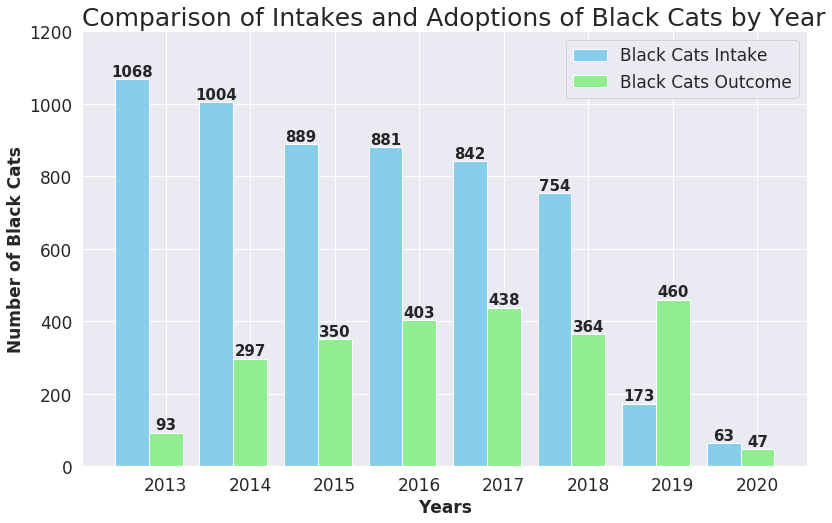

In [64]:
fig, ax = plt.subplots(1,1, figsize=(13,8))

# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = intake_outcome_year_cats['Number of Cats Intake']
bars2 = intake_outcome_year_cats['Number of Cats Outcome']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

def barlabel(bars):
    # attach some text labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom', fontweight='bold', fontsize=15)

plt.ylim((0,1200))

# Make the plot
ax1 = plt.bar(r1, bars1, color='skyblue', width=barWidth, edgecolor='white', label='Black Cats Intake')
ax2 = plt.bar(r2, bars2, color='lightgreen', width=barWidth, edgecolor='white', label='Black Cats Outcome')

barlabel(ax1)
barlabel(ax2)
 
# Add xticks on the middle of the group bars
plt.title('Comparison of Intakes and Adoptions of Black Cats by Year', loc='left', fontsize=25)
plt.xlabel('Years', fontweight='bold', fontsize=17)
plt.ylabel('Number of Black Cats', fontweight='bold', fontsize=17)
plt.xticks([r + barWidth for r in range(len(bars1))], [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], fontsize=17)
plt.yticks(fontsize=17)

# Create legend & Show graphic
plt.legend(fontsize=17)
plt.show()



In [65]:
dogs_adoption['Month Outcome'] = dogs_adoption['DateTime Outcome'].dt.month
dogs_adoption['Year Outcome'] = dogs_adoption['DateTime Outcome'].dt.year
dogs_incoming['Month Intake'] = dogs_incoming['DateTime Intake'].dt.month
dogs_incoming['Year Intake'] = dogs_incoming['DateTime Intake'].dt.year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [66]:
print(dogs_adoption['Month Outcome'].dtype)
print(dogs_adoption['Year Outcome'].dtype)
print(dogs_incoming['Month Intake'].dtype)
print(dogs_incoming['Year Intake'].dtype)

int64
int64
int64
int64


In [67]:
black_dogs_adoption = dogs_adoption[dogs_adoption['Color Outcome'] == 'Black']
val_b_dog = black_dogs_adoption['Month Outcome'].value_counts().sort_index()
val_b_dog

1     158
2     136
3     115
4     112
5     136
6     115
7     138
8     134
9     100
10    137
11     99
12    142
Name: Month Outcome, dtype: int64

In [68]:
black_dogs_adoption_month = pd.DataFrame(data=val_b_dog.values, columns=['Number of Dogs'], index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                                                                          'September', 'October', 'November', 'December'])
print(black_dogs_adoption_month['Number of Dogs'].dtype)
black_dogs_adoption_month['Month'] = black_dogs_adoption_month.index
black_dogs_adoption_month.reset_index(drop=True, inplace=True)
black_dogs_adoption_month.index

int64


RangeIndex(start=0, stop=12, step=1)

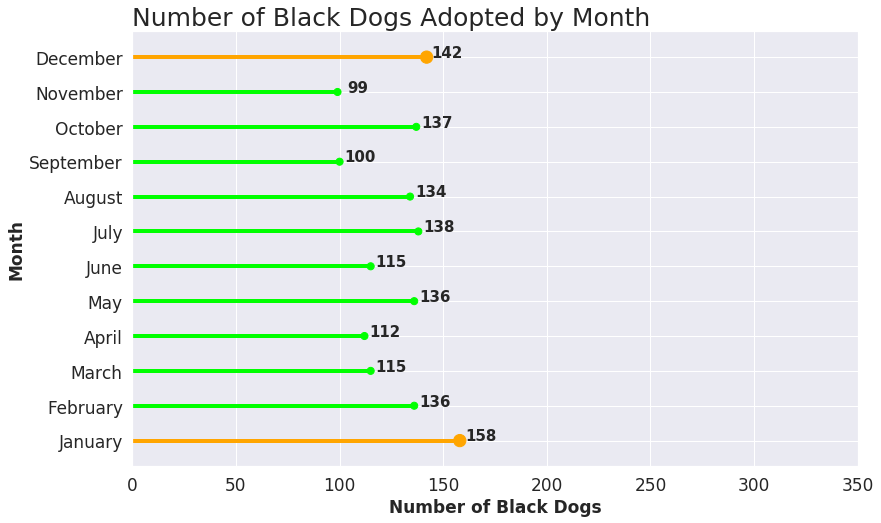

In [69]:
fig, ax = plt.subplots(1,1, figsize=(13,8))

plt.xlim((0,350))

my_color=np.where((black_dogs_adoption_month["Month"] == 'January') | (black_dogs_adoption_month['Month'] == 'December'), 'orange', 'lime')
my_size=np.where((black_dogs_adoption_month['Month'] =='January') | (black_dogs_adoption_month['Month'] == 'December'), 150, 50)

ax = plt.hlines(y=black_dogs_adoption_month['Month'], xmin=0, xmax=black_dogs_adoption_month['Number of Dogs'], color=my_color, linewidth=4)
ax = plt.scatter(black_dogs_adoption_month['Number of Dogs'], black_dogs_adoption_month['Month'], color=my_color, s=my_size)

for x,y in zip(black_dogs_adoption_month['Number of Dogs'], black_dogs_adoption_month['Month']):
  plt.annotate(x,
               (x,y),
               xytext=(x+10,y),
               ha='center',
               fontweight='bold',
               fontsize=15)

plt.title("Number of Black Dogs Adopted by Month", loc='left', fontsize=25)
plt.xlabel('Number of Black Dogs', fontweight='bold', fontsize=17)
plt.ylabel('Month', fontweight='bold', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

In [70]:
value_b_dog = black_dogs_adoption['Year Outcome'].value_counts().sort_index()
value_b_dog

2013     65
2014    232
2015    206
2016    273
2017    260
2018    210
2019    241
2020     35
Name: Year Outcome, dtype: int64

In [71]:
value_b_dog_intake = dogs_incoming[dogs_incoming['Color Intake'] == 'Black']
val_b_dog_intake = value_b_dog_intake['Year Intake'].value_counts()
val_b_dog_intake = np.array(val_b_dog_intake.values)
val_b_dog_intake

array([617, 564, 550, 549, 547, 456, 140,  78])

In [72]:
black_dogs_intake_year = pd.DataFrame(data=val_b_dog_intake, columns=['Number of Dogs Intake'], index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
print(black_dogs_intake_year.index.dtype)
black_dogs_intake_year

int64


,Number of Dogs Intake
2013,617
2014,564
2015,550
2016,549
2017,547
2018,456
2019,140
2020,78


In [73]:
black_dogs_adoption_year = pd.DataFrame(data=value_b_dog.values, columns=['Number of Dogs Outcome'], index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
print(black_dogs_adoption_year.index.dtype)
black_dogs_adoption_year

int64


,Number of Dogs Outcome
2013,65
2014,232
2015,206
2016,273
2017,260
2018,210
2019,241
2020,35


In [74]:
intake_outcome_year_dogs = pd.merge(black_dogs_intake_year, black_dogs_adoption_year, left_index=True, right_index=True, how='inner')
intake_outcome_year_dogs

,Number of Dogs Intake,Number of Dogs Outcome
2013,617,65
2014,564,232
2015,550,206
2016,549,273
2017,547,260
2018,456,210
2019,140,241
2020,78,35


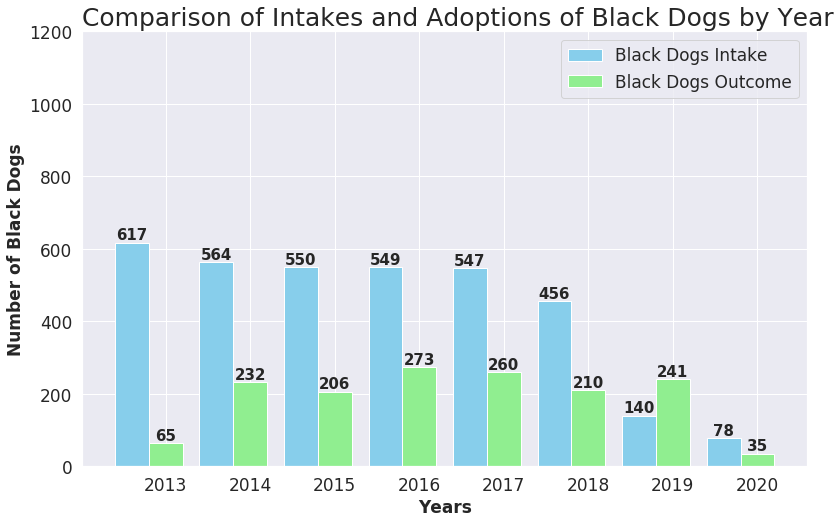

In [75]:
fig, ax = plt.subplots(1,1, figsize=(13,8))

# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = intake_outcome_year_dogs['Number of Dogs Intake']
bars2 = intake_outcome_year_dogs['Number of Dogs Outcome']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.ylim((0,1200))

def barlabel(bars):
    # attach some text labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom', fontweight='bold', fontsize=15)

 
# Make the plot
ax1 = plt.bar(r1, bars1, color='skyblue', width=barWidth, edgecolor='white', label='Black Dogs Intake')
ax2 = plt.bar(r2, bars2, color='lightgreen', width=barWidth, edgecolor='white', label='Black Dogs Outcome')
 
barlabel(ax1)
barlabel(ax2)

# Add xticks on the middle of the group bars
plt.title('Comparison of Intakes and Adoptions of Black Dogs by Year', loc='left', fontsize=25)
plt.xlabel('Years', fontweight='bold', fontsize=17)
plt.ylabel('Number of Black Dogs',fontweight='bold', fontsize=17)
plt.xticks([r + barWidth for r in range(len(bars1))], [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], fontsize=17)
plt.yticks(fontsize=17) 
# Create legend & Show graphic
plt.legend(fontsize=17)
plt.show()

In [76]:
shelter_full_cats = pd.merge(cats_incoming, cats_adoption, on=['Animal ID'], how='inner')
shelter_full_cats.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake,Month Intake,Year Intake,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome,Month Outcome,Year Outcome
0,A664264,*Mason,2013-10-01 11:51:00,4915 Yager Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013,*Mason,2013-10-14 12:25:00,07/17/2013,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013
1,A664265,*Dixon,2013-10-01 11:51:00,4915 Yager Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013,*Dixon,2013-10-12 18:20:00,07/17/2013,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013
2,A664268,*Kochka,2013-10-01 12:05:00,Austin (TX),Stray,Normal,Cat,Intact Female,3 years,Russian Blue Mix,Blue,10,2013,*Kochka,2013-11-04 17:30:00,10/01/2010,Adoption,NaN,Cat,Spayed Female,3 years,Russian Blue Mix,Blue,11,2013
3,A664283,Juliet,2013-10-01 15:20:00,1001 Bouldin Ave in Austin (TX),Stray,Nursing,Cat,Intact Female,1 year,Domestic Shorthair Mix,Black/White,10,2013,Juliet,2013-10-13 17:24:00,10/01/2012,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Black/White,10,2013
4,A664291,*Tyler,2013-10-01 16:05:00,Austin (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,10,2013,*Tyler,2013-12-16 13:48:00,09/01/2013,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black,12,2013


In [0]:
shelter_full_cats['Days Spent'] =  (shelter_full_cats['DateTime Outcome'] - shelter_full_cats['DateTime Intake']).dt.days
shelter_full_cats = shelter_full_cats[shelter_full_cats['Days Spent'] != 0]

In [78]:
shelter_full_cats.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake,Month Intake,Year Intake,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome,Month Outcome,Year Outcome,Days Spent
0,A664264,*Mason,2013-10-01 11:51:00,4915 Yager Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013,*Mason,2013-10-14 12:25:00,07/17/2013,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013,13
1,A664265,*Dixon,2013-10-01 11:51:00,4915 Yager Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013,*Dixon,2013-10-12 18:20:00,07/17/2013,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Brown Tabby,10,2013,11
2,A664268,*Kochka,2013-10-01 12:05:00,Austin (TX),Stray,Normal,Cat,Intact Female,3 years,Russian Blue Mix,Blue,10,2013,*Kochka,2013-11-04 17:30:00,10/01/2010,Adoption,NaN,Cat,Spayed Female,3 years,Russian Blue Mix,Blue,11,2013,34
3,A664283,Juliet,2013-10-01 15:20:00,1001 Bouldin Ave in Austin (TX),Stray,Nursing,Cat,Intact Female,1 year,Domestic Shorthair Mix,Black/White,10,2013,Juliet,2013-10-13 17:24:00,10/01/2012,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Black/White,10,2013,12
4,A664291,*Tyler,2013-10-01 16:05:00,Austin (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,10,2013,*Tyler,2013-12-16 13:48:00,09/01/2013,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black,12,2013,75


In [79]:
shelter_full_cats['Days Spent'].min()
shelter_full_cats.shape

(21999, 26)

In [0]:
cats_spent = shelter_full_cats['Color Outcome'].isin(['Brown Tabby', 'Black', 'Black/White', 'Brown Tabby/White', 'Orange Tabby', 'Calico', 'Tortie', 'Orange Tabby/White',
                                            'Blue Tabby', 'Blue', 'Torbie', 'Blue/White', 'Blue Tabby/White', 'Cream Tabby', 'White/Black', 'Lynx Point', 'White/Brown Tabby',
                                            'Seal Point', 'Cream Tabby/White', 'Flame Point', 'White', 'Torbie/White', 'White/Blue', 'Black Smoke'])
cats_spent_days = shelter_full_cats[cats_spent].sort_values(by='Color Outcome', ascending=True)
cats_spent_days = cats_spent_days[cats_spent_days['Days Spent'] >= 0]


In [81]:
black_cats_spent_days = cats_spent_days[cats_spent_days['Color Outcome'] == 'Black']
black_cats_spent_days['Days Spent'].max()


1762

In [82]:
black_cats_spent_days[black_cats_spent_days['Days Spent'] == 1762]

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake,Month Intake,Year Intake,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome,Month Outcome,Year Outcome,Days Spent
3339,A690431,*Spooky,2014-10-20 16:13:00,Lambs Ln in Austin (TX),Stray,Normal,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black,10,2014,*Spooky,2019-08-17 16:26:00,09/28/2014,Adoption,NaN,Cat,Spayed Female,4 years,Domestic Longhair Mix,Black,8,2019,1762


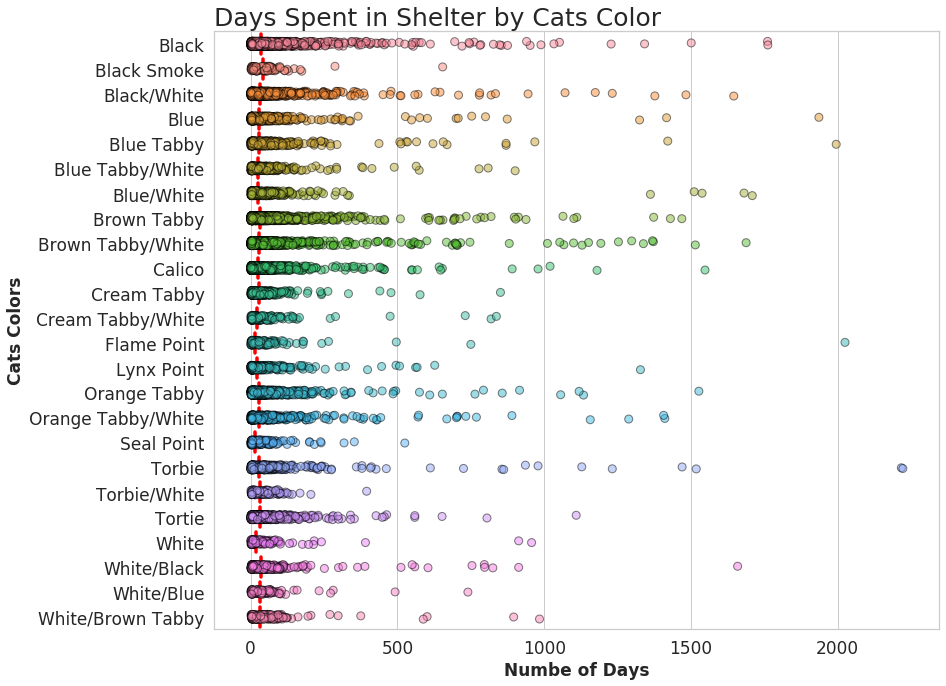

In [105]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1, figsize=(13,11))

sns.stripplot(x=cats_spent_days['Days Spent'], y=cats_spent_days['Color Outcome'], data=cats_spent_days, edgecolor='black', linewidth=1, size=8, alpha=0.5, marker='o')

sns.boxplot(cats_spent_days['Days Spent'], y=cats_spent_days['Color Outcome'], data=cats_spent_days, color='white', showfliers=False, whiskerprops=dict(linestyle='none'),
            showbox=False, showcaps=False, medianprops=dict(color='red', linewidth=3.5))


plt.title('Days Spent in Shelter by Cats Color', loc='left', fontsize=25)
plt.xlabel('Numbe of Days', fontweight='bold', fontsize=17)
plt.ylabel('Cats Colors',fontweight='bold', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17) 

plt.show()

In [90]:
shelter_full_dogs = pd.merge(dogs_incoming, dogs_adoption, on=['Animal ID'], how='inner')
shelter_full_dogs.head()

,Animal ID,Name intake,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type Intake,Sex upon Intake,Age upon Intake,Breed Intake,Color Intake,Month Intake,Year Intake,Name Outcome,DateTime Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type Outcome,Sex upon Outcome,Age upon Outcome,Breed Outcome,Color Outcome,Month Outcome,Year Outcome
0,A664257,Pippin,2013-10-01 11:01:00,Burleson in Travis (TX),Stray,Normal,Dog,Intact Female,4 years,Podengo Pequeno Mix,Black,10,2013,Pippin,2013-10-24 13:31:00,10/01/2009,Adoption,Foster,Dog,Spayed Female,4 years,Podengo Pequeno Mix,Black,10,2013
1,A651630,Heather,2013-10-01 11:23:00,Outside Jurisdiction,Owner Surrender,Injured,Dog,Spayed Female,6 years,Labrador Retriever/Chinese Sharpei,Tan,10,2013,Heather,2013-12-31 15:13:00,04/13/2007,Adoption,NaN,Dog,Spayed Female,6 years,Labrador Retriever/Chinese Sharpei,Tan,12,2013
2,A664269,*Bismark,2013-10-01 11:28:00,7500 S Ih 35 in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Great Pyrenees Mix,White,10,2013,*Bismark,2013-10-19 15:40:00,10/01/2011,Adoption,NaN,Dog,Neutered Male,2 years,Great Pyrenees Mix,White,10,2013
3,A664273,Buffy,2013-10-01 13:32:00,Berkman Dr & Briarcliff Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Dachshund/Chihuahua Shorthair,Brown,10,2013,Buffy,2013-10-13 15:22:00,04/01/2012,Adoption,NaN,Dog,Spayed Female,1 year,Dachshund/Chihuahua Shorthair,Brown,10,2013
4,A664274,Estrella,2013-10-01 13:48:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,8 years,Siberian Husky Mix,Buff,10,2013,Estrella,2013-10-11 15:29:00,10/01/2005,Adoption,NaN,Dog,Spayed Female,8 years,Siberian Husky Mix,Buff,10,2013


In [0]:
shelter_full_dogs['Days Spent'] =  (shelter_full_dogs['DateTime Outcome'] - shelter_full_dogs['DateTime Intake']).dt.days
shelter_full_dogs = shelter_full_dogs[shelter_full_dogs['Days Spent'] >= 0]

In [0]:
dogs_spent = shelter_full_dogs['Color Outcome'].isin(['Black/White', 'Tan/White', 'Brown/White', 'Black', 'Tan', 'White', 'Tricolor', 'Black/Tan',
                                            'Black/Brown', 'Brown', 'Brown Brindle/White', 'Blue/White', 'Red/White', 'Red', 'Black/Tricolor', 'Chocolate/White', 'Sable',
                                            'Cream', 'Fawn/White', 'Yellow', 'Buff', 'Chocolate', 'Brown/Tan', 'Tan/Black'])
dogs_spent_days = shelter_full_dogs[dogs_spent].sort_values(by='Color Outcome', ascending=True)
dogs_spent_days = dogs_spent_days[dogs_spent_days['Days Spent'] >= 0]

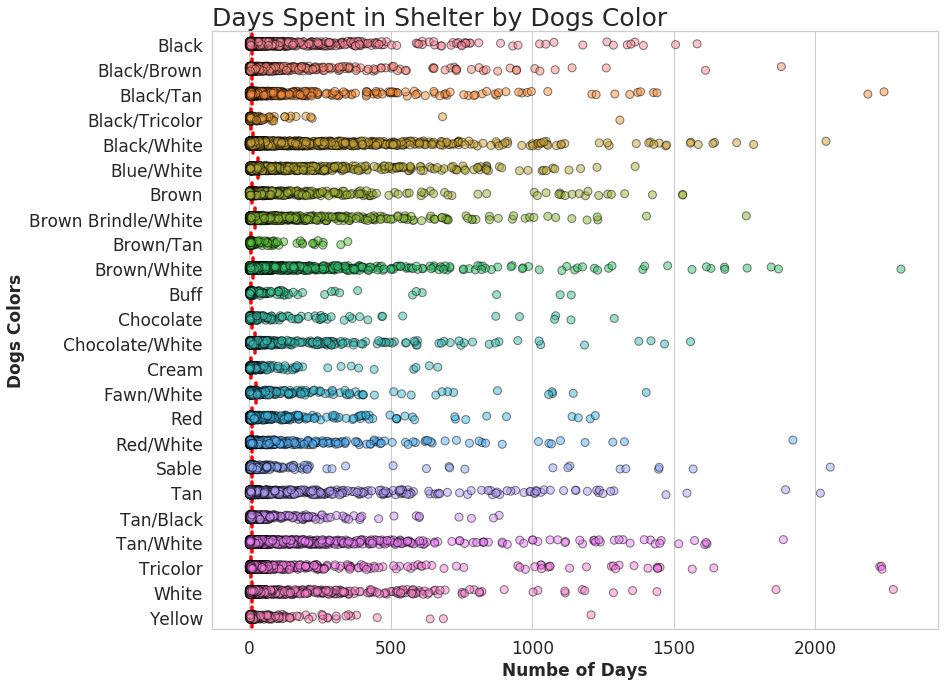

In [104]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1, figsize=(13,11))

sns.stripplot(x=dogs_spent_days['Days Spent'], y=dogs_spent_days['Color Outcome'], data=dogs_spent_days, edgecolor='black', linewidth=1, size=8, alpha=0.5, marker='o')

sns.boxplot(dogs_spent_days['Days Spent'], y=dogs_spent_days['Color Outcome'], data=dogs_spent_days, color='white', showfliers=False, whiskerprops=dict(linestyle='none'),
            showbox=False, showcaps=False, medianprops=dict(color='red', linewidth=3.5))


plt.title('Days Spent in Shelter by Dogs Color', loc='left', fontsize=25)
plt.xlabel('Numbe of Days', fontweight='bold', fontsize=17)
plt.ylabel('Dogs Colors',fontweight='bold', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17) 

plt.show()